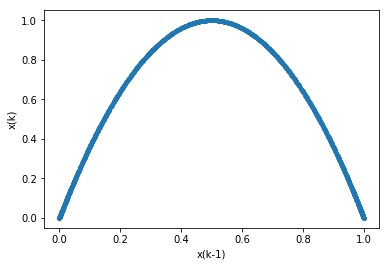

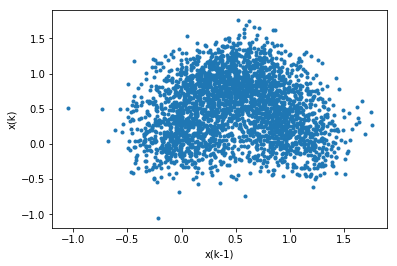

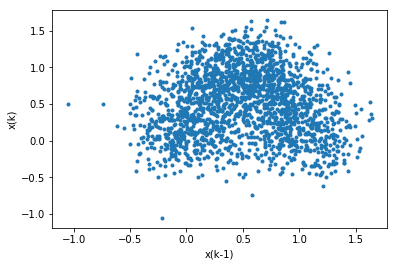

In [1]:
%matplotlib inline
import numpy as np
from sklearn.model_selection import KFold #Importando a função K-fold que vai gerar o iterador
import matplotlib.pyplot as plt

#Gerando valores de X e D ("dadosmapalogistico.m")
xold = np.random.rand()
N = 3000
VAL = 0.75 #Valor atribuído pelo professor
x = np.zeros(N)
for k in range(0,N):
    xnew = 4*xold*(1-xold)
    xold = xnew
    x[k] = xnew

plt.figure(1)
plt.plot(x[0:(len(x)-1)], x[1:len(x)], '.')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.show()
    
x = np.transpose(x + VAL*np.std(x)*np.random.randn(1,len(x)))

plt.figure(2)
plt.plot(x[0:(len(x)-1)], x[1:len(x)], '.')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.show()

x = x[999:N] #Descartando valores transitórios

plt.figure(3)
plt.plot(x[0:(len(x)-1)], x[1:len(x)], '.')
plt.xlabel('x(k-1)')
plt.ylabel('x(k)')
plt.show()

X = x[0:(N-1000)]
D = x[1:(N-999)]

In [2]:
COMP = [50, 100, 500, 1000] #Comprimentos sugeridos para o conjunto de treinamento
P = 10 #numero de neurônios
N = 5 #Número de repetições por neurônios

In [3]:
#Utilizaremos uma função para treinamento da ELM de acordo com o explicado no documento 3
def treinaelm(X,D,P):
    U = np.random.randn(P, 2) #Distribuição Gaussiana
    Xa = np.c_[X, np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    V = np.transpose(np.linalg.pinv(Ha)@D)
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    EQM = 1/(D.shape[0])*(np.transpose(E)@E)  #EQM da rede
    return (U,V,Y,E,EQM)

In [4]:
#Utilizaremos uma função para cálculo do erro da ELM de acordo com o explicado no documento 3
def erroelm(X,D,U,V):
    Xa = np.c_[X,np.ones(X.shape[0])]
    S = Xa@np.transpose(U)
    H = np.tanh(S)
    Ha = np.c_[H,np.ones(X.shape[0])]
    R = Ha@np.transpose(V)
    Y = R
    E = D-Y
    EQM = 1/(D.shape[0])*(np.transpose(E)@E)
    return (Y,E,EQM)

In [5]:
#Função para realizar o cross-validation para determinada quantidade de P neuronios por N repetições        
def cross_train(N, P, Xtr, Xt, Dtr, Dt):
    # Cross-validation Leave-One-Out
    kf = KFold(n_splits=Xtr.shape[0]) #Definindo o iterador de acordo com o valor de K escolhido
    #Utilizando o iterador criado, e repetindo o processo N vezes para cada P neurônios na camada oculta temos:
    veteqmtr = np.array([])
    veteqmv = np.array([])
    erropredtr = np.ones((N,P))
    erropredv = np.ones((N,P))
    errotest = np.ones((N,P))
    for p in range (1,P+1): #Quantidade de Neurônios ocultos
        for n in range(0,N): #Repetições por neurônio
            for train_index, val_index in kf.split(Xtr):
                X_train, X_val = Xtr[train_index], Xtr[val_index]
                D_train, D_val = Dtr[train_index], Dtr[val_index]
                [U,V,Ytr,Etr,EQMtr] = treinaelm(X_train,D_train,p)
                veteqmtr = np.append(veteqmtr, EQMtr);
                [Yv,Ev,EQMv] = erroelm(X_val,D_val,U,V)
                veteqmv = np.append(veteqmv, EQMv);
            [Yt,Et,EQMt] = erroelm(Xt,Dt,U,V)
            errotest[n][p-1] = EQMt
            erropredtr[n][p-1] =  np.mean(veteqmtr);
            erropredv[n][p-1] = np.mean(veteqmv);
            veteqmv = []
            veteqmtr = []
    return (erropredtr, erropredv, errotest)

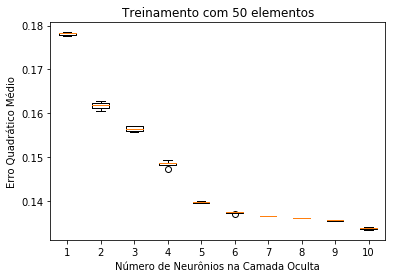

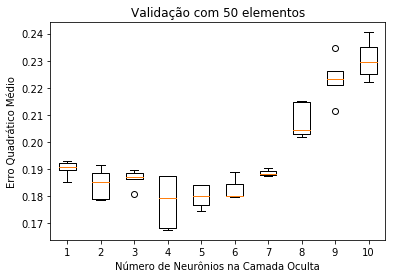

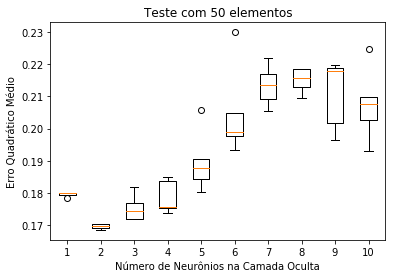

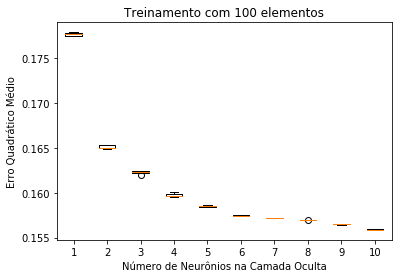

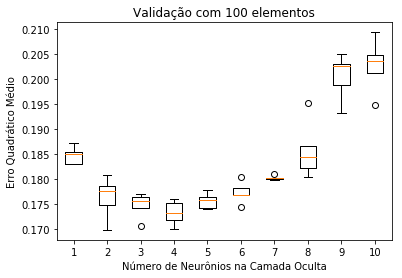

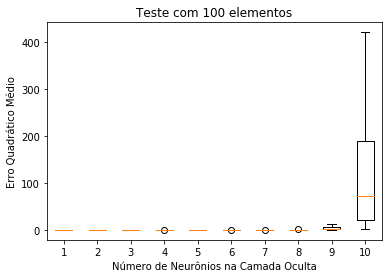

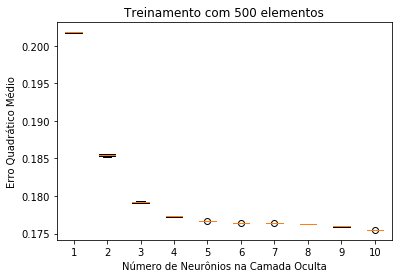

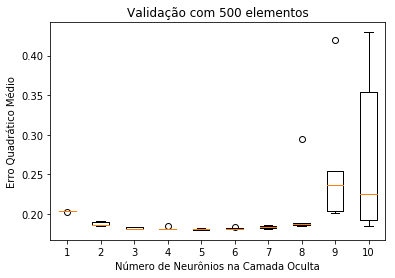

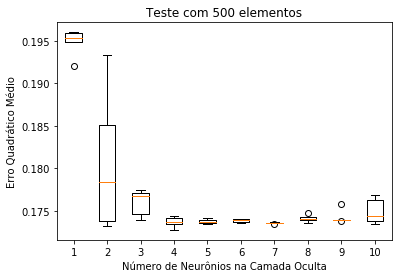

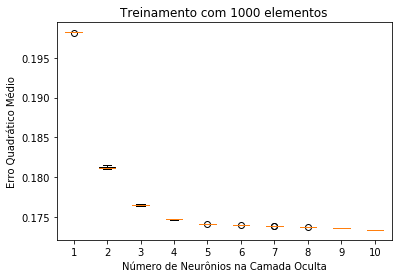

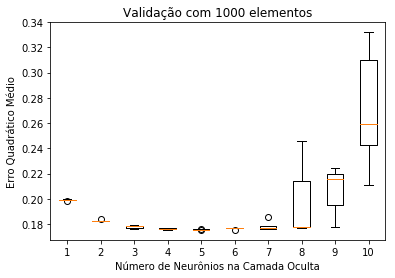

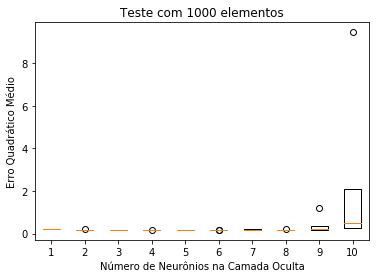

In [6]:
#Conjunto de treinamento com diferentes tamanhos sendo treinados
cont_figure = 3

for comp in COMP:
    cont_figure+=1
    Xtr = X[0:comp]
    Dtr = D[0:comp]
    Xt = X[comp:2*comp]
    Dt = D[comp:2*comp]
    [erropredtr,erropredval,errotest] = cross_train(N, P, Xtr, Xt, Dtr, Dt)

    #Erro de predição no treinamento
    plt.figure(cont_figure)
    plt.title("Treinamento com "+ str(comp)+ " elementos")
    plt.xlabel("Número de Neurônios na Camada Oculta")
    plt.ylabel("Erro Quadrático Médio")
    plt.boxplot(erropredtr)
    plt.show()

    cont_figure+=1
    
    #Erro de predição na validação
    plt.figure(cont_figure)
    plt.title("Validação com " + str(comp) + " elementos")
    plt.xlabel("Número de Neurônios na Camada Oculta")
    plt.ylabel("Erro Quadrático Médio")
    plt.boxplot(erropredval)
    plt.show()
    
    cont_figure+=1
    
    #Erro de predição no teste
    plt.figure(cont_figure)
    plt.title("Teste com " + str(comp) + " elementos")
    plt.xlabel("Número de Neurônios na Camada Oculta")
    plt.ylabel("Erro Quadrático Médio")
    plt.boxplot(errotest)
    plt.show()